#### autoreload

In [1]:
%load_ext autoreload
%autoreload 2

import __confing
__confing.change_to_root_folder()

# `Feature Selection`

In [8]:
import pandas as pd
import polars as pl

from src import value_filler

### data

In [93]:
pd.set_option('display.max_columns', None)

df=pd.read_csv(r'data\waves\wave5.csv')

df.head()

,r5agey,r5arthre,r5cancre,r5dadage,r5hearte,r5hibpe,r5higov,r5hosp1y,r5lunge_m,r5mealhlp,r5medhlp,r5momage,r5moneyhlp,r5oopden1y,r5oopdoc1y,r5oophos1y,r5oopmd1y,r5ooposrg1y,r5prmem,r5rafaany,r5rifaany,r5rjudg,r5rorgnz,r5shophlp,r5smokef,r5smoken,r5smokev,r5stroke,r5strtsmok,rahhidnp
0,68.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,NaN,0.0,90.0,NaN,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,120
1,86.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0,600.0,4944.193359,5544.193359,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,14.0,210
2,68.0,0.0,0.0,87.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,100.0,NaN,350.0,0.0,0.000000,350.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,18.0,310
3,47.0,0.0,0.0,65.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,58.0,NaN,0.0,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,13.0,311
4,67.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,8000.0,0.0,0.000000,8000.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,420


### money

In [ ]:
# money
v_fill = value_filler.find_column_name(df,'oop')
for c in v_fill:
    df[c] = value_filler.fill_column(df, c, strategy='mean')

### help

In [7]:
# help
v_drop = value_filler.find_column_name(df,'hlp')
for c in v_drop:
    df = df.drop(c, axis=1)

v_drop = value_filler.find_column_name(df,'aany')
for c in v_drop:
    df = df.drop(c, axis=1)

v_drop = value_filler.find_column_name(df,'gov')
for c in v_drop:
    df = df.drop(c, axis=1)

### diases

In [ ]:
# diases
v_fill = ['r5arthre', 'r5cancre', 'r5hearte', 'r5hibpe', 'r5lunge_m', 'r5stroke']
for c in v_fill:
    df[c] = value_filler.fill_column(df, c, strategy='mean')

### smoke

In [ ]:
# smoke
v_drop = value_filler.find_column_name(df,'smok')
v_drop .pop(1)
for c in v_drop:
    df = df.drop(c, axis=1)
    
df['r5smoken'] = value_filler.fill_column(df, 'r5smoken', strategy='mean')

### plus

In [ ]:
# plus
v_fill = value_filler.find_column_name(df,'age')

for c in v_fill:
    df[c] = value_filler.fill_column(df, c, strategy='mean')

In [11]:
# plus
v_drop=['r5prmem','r5rjudg','r5rorgnz']
for c in v_drop:
    df = df.drop(c, axis=1)

### *Final features*

In [83]:
print(f'->columns selected: {len(df.columns)}<-')
for c in df.columns:
    value_filler.null_per_column(df, c)

->columns selected: 17<-
r5agey nulls: 0
r5arthre nulls: 0
r5cancre nulls: 0
r5dadage nulls: 0
r5hearte nulls: 0
r5hibpe nulls: 0
r5hosp1y nulls: 0
r5lunge_m nulls: 0
r5momage nulls: 0
r5oopden1y nulls: 0
r5oopdoc1y nulls: 0
r5oophos1y nulls: 0
r5oopmd1y nulls: 0
r5ooposrg1y nulls: 0
r5smoken nulls: 0
r5stroke nulls: 0
rahhidnp nulls: 0


# `Models` 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from src import evaluation

## Preprocess

In [78]:
value_filler.values_columns(df,['r5hosp1y'])

r5hosp1y:
Number of NaN values: 0
Percentage of NaN values: 0.0%
Number of 0s: 14714
Percentage of 0s: 86.32%
Number of 1s: 2332
Percentage of 1s: 13.68%



In [15]:
df_1 = df[df['r5hosp1y'] == 1]
df_0 = df[df['r5hosp1y'] == 0]

df_0_resampled = resample(df_0, replace=False, n_samples=len(df_1), random_state=42)

df_equalized = pd.concat([df_1, df_0_resampled])

df_equalized = df_equalized.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_equalized['r5hosp1y'].value_counts())

r5hosp1y
0.0    2332
1.0    2332
Name: count, dtype: int64


In [16]:
y = df_equalized['r5hosp1y']
x = df_equalized.drop('r5hosp1y', axis=1)

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## LogisticRegression

In [90]:
from sklearn.linear_model import LogisticRegression

params={
    'C': 71.41507212621086, 
    'max_iter': 625, 
    'fit_intercept': True, 
    'solver': 'newton-cg', 
    'tol': 0.00022473201674343764
}
logreg = LogisticRegression(**params)

c:\Users\Leo\OneDrive\Escritorio\Final Proyect\env\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Leo\OneDrive\Escritorio\Final Proyect\env\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Leo\OneDrive\Escritorio\Final Proyect\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


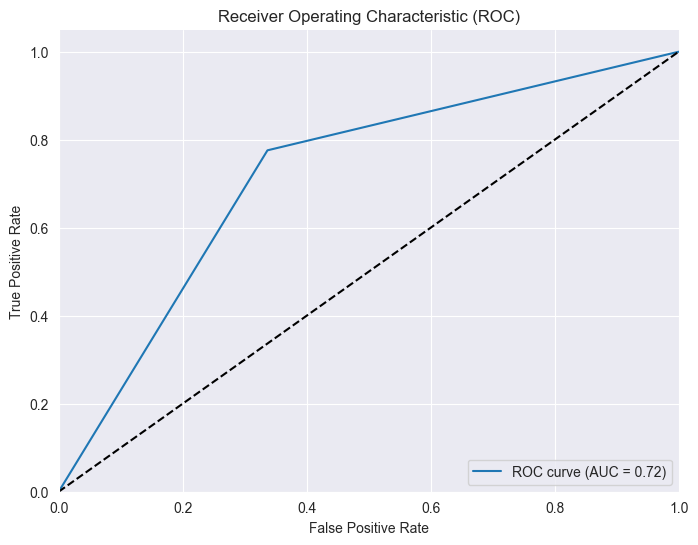

In [91]:
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

evaluation.plot_roc(y_pred,y_test)

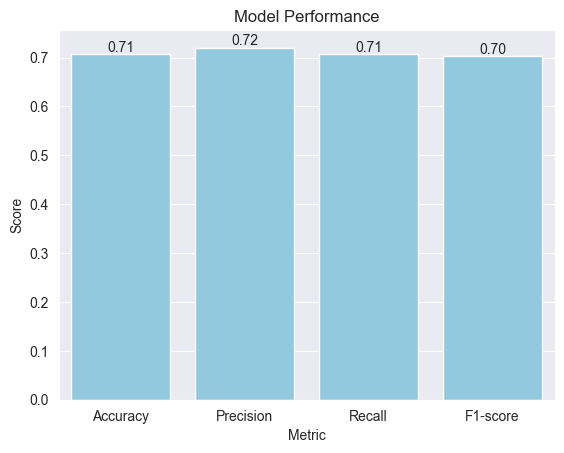

In [92]:
evaluation.get_model_performance(y_pred,y_test)

## LGBM

In [86]:
import lightgbm as lgb

params = {
    'num_leaves': 37,
    'learning_rate': 0.015822147370206017,
    'feature_fraction': 0.27675906087193586,
    'bagging_fraction': 0.7771549814223269,
    'bagging_freq': 4,
    'min_child_samples': 8, # Se detendrá el entrenamiento si no hay mejoras en 50 iteraciones consecutivas
}

model = lgb.LGBMClassifier(**params)

[LightGBM] [Warning] feature_fraction is set=0.27675906087193586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27675906087193586
[LightGBM] [Warning] bagging_fraction is set=0.7771549814223269, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7771549814223269
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


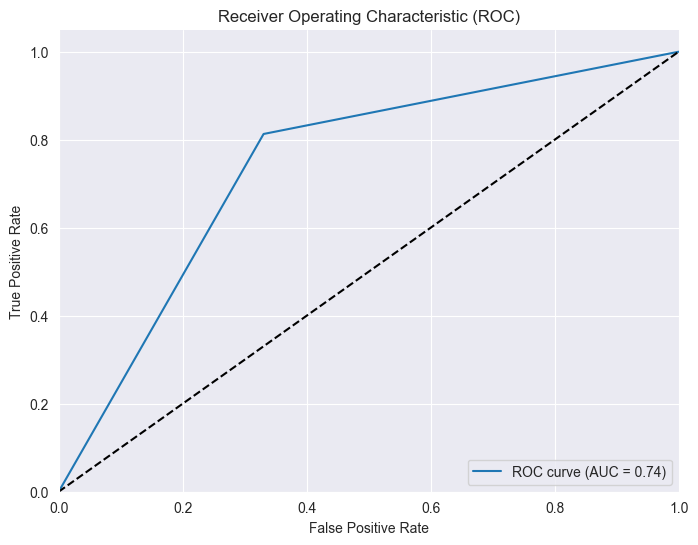

In [88]:
model.fit(x_train, y_train)
    
y_pred = model.predict(x_test)

evaluation.plot_roc(y_pred,y_test)

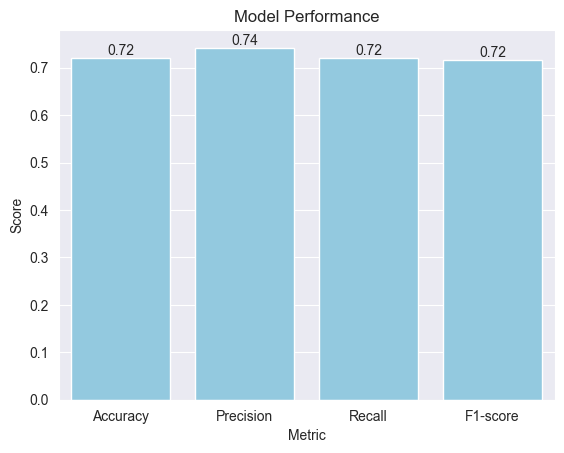

In [89]:
evaluation.get_model_performance(y_pred,y_test)

# `Summary`

##### In conclusion, the baseline models were developed using **Wave 5** data as it was the most recent and closely aligned with the data the model will work with in production. After selecting the relevant columns, features such as smoke were excluded due to **insufficient data availability**, despite their importance. Two baseline models were trained, a **logistic regression** and a **tree-based model**. The tree-based model outperformed the logistic regression model by 2%. Achieving a **72% accuracy** and **0.74 AUC** with only **20% of the dataset** and **17 features**, it is estimated that the model will reach the desired values (AUC score over 0.9 and fewer than 50 features).